In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] # sliding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccX' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccX is registed now
Build Complete
(254742,)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=16-SGD
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.4612 - val_loss: 0.2029
Epoch 2/50
1s - loss: 0.1171 - val_loss: 0.0709
Epoch 3/50
1s - loss: 0.0567 - val_loss: 0.0472
Epoch 4/50
1s - loss: 0.0419 - val_loss: 0.0376
Epoch 5/50
1s - loss: 0.0347 - val_loss: 0.0323
Epoch 6/50
1s - loss: 0.0304 - val_loss: 0.0288
Epoch 7/50
1s - loss: 0.0275 - val_loss: 0.0264
Epoch 8/50
1s - loss: 0.0254 - val_loss: 0.0245
Epoch 9/50
1s - loss: 0.0238 - val_loss: 0.0231
Epoch 10/50
1s - loss: 0.0225 - val_loss: 0.0219
Epoch 11/50
1s - loss: 0.0214 - val_loss: 0.0210
Epoch 12/50
1s - loss: 0.0206 - val_loss: 0.0202
Epoch 13/50
1s - loss: 0.0198 - val_loss: 0.0195
Epoch 14/50
0s - loss: 0.0192 - val_loss: 0.0189
Epoch 15/50
0s - loss: 0.0186 - val_loss: 0.0184
Epoch 16/50
0s - loss: 0.0181 - val_loss

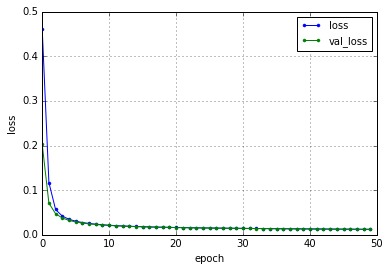

hiden node = 16
-edim=16-Window=128-Overlap=16-Adadelta
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.1165 - val_loss: 0.0193
Epoch 2/50
1s - loss: 0.0140 - val_loss: 0.0109
Epoch 3/50
1s - loss: 0.0092 - val_loss: 0.0108
Epoch 4/50
1s - loss: 0.0073 - val_loss: 0.0057
Epoch 5/50
0s - loss: 0.0067 - val_loss: 0.0110
Epoch 6/50
0s - loss: 0.0059 - val_loss: 0.0044
Epoch 7/50
0s - loss: 0.0056 - val_loss: 0.0047
Epoch 8/50
0s - loss: 0.0052 - val_loss: 0.0038
Epoch 9/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 10/50
0s - loss: 0.0048 - val_loss: 0.0096
Epoch 11/50
1s - loss: 0.0049 - val_loss: 0.0034
Epoch 12/50
1s - loss: 0.0047 - val_loss: 0.0057
Epoch 13/50
1s - loss: 0.0044 - val_loss: 0.0031
Epoch 14/50
0s - loss: 0.0045 - val_loss: 0.0052
Epoch 15/50
0s - loss: 0.0041 - val_loss: 0.0026
Epoch 16/50
0s - loss: 0.0039 - val_loss: 0.0025
Epoch 17/50
0s - loss: 0.0041 - val_loss: 0.0028
Epoch 18/50
0s - loss: 0.0038 - val_loss: 0.0025
Epoch 19/50
0s - loss

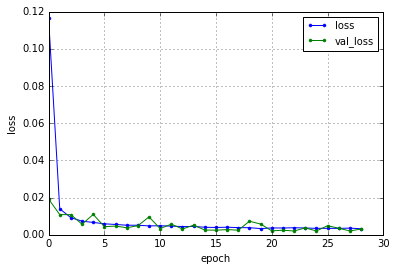

hiden node = 16
-edim=16-Window=128-Overlap=16-Adamax
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0563 - val_loss: 0.0156
Epoch 2/50
1s - loss: 0.0130 - val_loss: 0.0114
Epoch 3/50
1s - loss: 0.0086 - val_loss: 0.0068
Epoch 4/50
1s - loss: 0.0057 - val_loss: 0.0046
Epoch 5/50
1s - loss: 0.0042 - val_loss: 0.0035
Epoch 6/50
1s - loss: 0.0031 - val_loss: 0.0027
Epoch 7/50
1s - loss: 0.0024 - val_loss: 0.0019
Epoch 8/50
1s - loss: 0.0019 - val_loss: 0.0015
Epoch 9/50
1s - loss: 0.0015 - val_loss: 0.0011
Epoch 10/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 12/50
0s - loss: 9.4605e-04 - val_loss: 7.0770e-04
Epoch 13/50
0s - loss: 8.0297e-04 - val_loss: 6.7199e-04
Epoch 14/50
0s - loss: 7.6874e-04 - val_loss: 6.9840e-04
Epoch 15/50
0s - loss: 7.3779e-04 - val_loss: 5.6918e-04
Epoch 16/50
0s - loss: 6.7854e-04 - val_loss: 6.7422e-04
Epoch 17/50
0s - loss: 6.8549e-04 - val_loss: 6.0322e-04
Epoch 18/50
0s - loss: 6

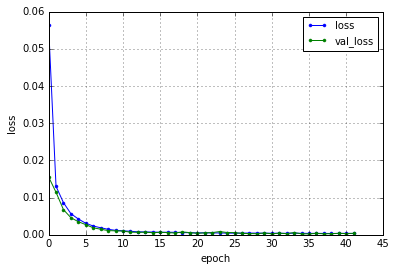

hiden node = 16
-edim=16-Window=128-Overlap=16-Adam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0760 - val_loss: 0.0134
Epoch 2/50
0s - loss: 0.0107 - val_loss: 0.0082
Epoch 3/50
0s - loss: 0.0067 - val_loss: 0.0056
Epoch 4/50
0s - loss: 0.0047 - val_loss: 0.0039
Epoch 5/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 6/50
0s - loss: 0.0028 - val_loss: 0.0060
Epoch 7/50
0s - loss: 0.0023 - val_loss: 0.0018
Epoch 8/50
0s - loss: 0.0019 - val_loss: 0.0015
Epoch 9/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
0s - loss: 0.0014 - val_loss: 0.0012
Epoch 11/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 12/50
0s - loss: 0.0011 - val_loss: 0.0020
Epoch 13/50
0s - loss: 9.6606e-04 - val_loss: 7.7136e-04
Epoch 14/50
0s - loss: 9.2318e-04 - val_loss: 6.1093e-04
Epoch 15/50
0s - loss: 7.9007e-04 - val_loss: 0.0030
Epoch 16/50
0s - loss: 8.0640e-04 - val_loss: 7.4745e-04
Epoch 17/50
0s - loss: 6.4930e-04 - val_loss: 5.3185e-04
Epoch 18/50
0s - loss: 6.1072e-04 - va

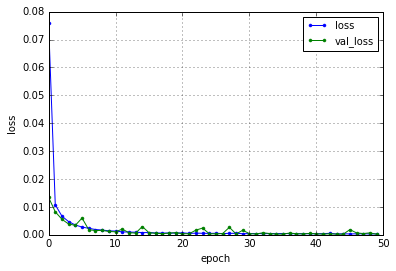

hiden node = 16
-edim=16-Window=128-Overlap=16-Adagrad
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0323 - val_loss: 0.0152
Epoch 2/50
0s - loss: 0.0124 - val_loss: 0.0105
Epoch 3/50
0s - loss: 0.0097 - val_loss: 0.0125
Epoch 4/50
0s - loss: 0.0079 - val_loss: 0.0081
Epoch 5/50
0s - loss: 0.0067 - val_loss: 0.0063
Epoch 6/50
0s - loss: 0.0060 - val_loss: 0.0072
Epoch 7/50
0s - loss: 0.0055 - val_loss: 0.0052
Epoch 8/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 9/50
0s - loss: 0.0048 - val_loss: 0.0048
Epoch 10/50
0s - loss: 0.0045 - val_loss: 0.0043
Epoch 11/50
0s - loss: 0.0042 - val_loss: 0.0063
Epoch 12/50
0s - loss: 0.0040 - val_loss: 0.0041
Epoch 13/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 14/50
0s - loss: 0.0035 - val_loss: 0.0054
Epoch 15/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 16/50
0s - loss: 0.0032 - val_loss: 0.0040
Epoch 17/50
0s - loss: 0.0030 - val_loss: 0.0030
Epoch 18/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 19/50
0s - loss:

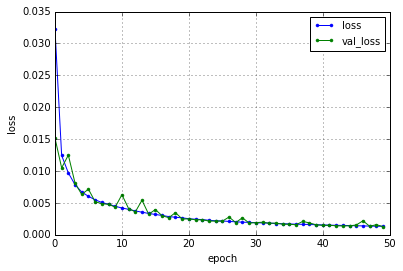

hiden node = 16
-edim=16-Window=128-Overlap=16-RMSprop
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0500 - val_loss: 0.0123
Epoch 2/50
0s - loss: 0.0104 - val_loss: 0.0061
Epoch 3/50
0s - loss: 0.0092 - val_loss: 0.0074
Epoch 4/50
0s - loss: 0.0084 - val_loss: 0.0067
Epoch 5/50
0s - loss: 0.0079 - val_loss: 0.0046
Epoch 6/50
0s - loss: 0.0075 - val_loss: 0.0214
Epoch 7/50
0s - loss: 0.0075 - val_loss: 0.0072
Epoch 8/50
0s - loss: 0.0072 - val_loss: 0.0056
Epoch 9/50
0s - loss: 0.0071 - val_loss: 0.0039
Epoch 10/50
0s - loss: 0.0069 - val_loss: 0.0120
Epoch 11/50
0s - loss: 0.0068 - val_loss: 0.0054
Epoch 12/50
0s - loss: 0.0066 - val_loss: 0.0054
Epoch 13/50
0s - loss: 0.0064 - val_loss: 0.0057
Epoch 14/50
0s - loss: 0.0064 - val_loss: 0.0030
Epoch 15/50
0s - loss: 0.0063 - val_loss: 0.0050
Epoch 16/50
0s - loss: 0.0062 - val_loss: 0.0091
Epoch 17/50
0s - loss: 0.0061 - val_loss: 0.0031
Epoch 18/50
0s - loss: 0.0059 - val_loss: 0.0041
Epoch 19/50
0s - loss:

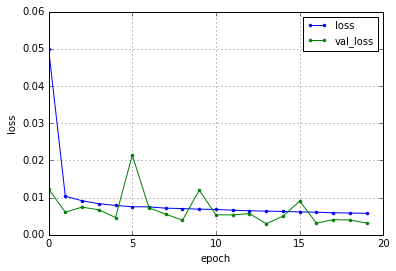

hiden node = 16
-edim=16-Window=128-Overlap=16-Nadam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0493 - val_loss: 0.0170
Epoch 2/50
1s - loss: 0.0122 - val_loss: 0.0074
Epoch 3/50
1s - loss: 0.0091 - val_loss: 0.0115
Epoch 4/50
1s - loss: 0.0083 - val_loss: 0.0043
Epoch 5/50
1s - loss: 0.0068 - val_loss: 0.0073
Epoch 6/50
1s - loss: 0.0061 - val_loss: 0.0032
Epoch 7/50
0s - loss: 0.0056 - val_loss: 0.0077
Epoch 8/50
0s - loss: 0.0050 - val_loss: 0.0035
Epoch 9/50
0s - loss: 0.0046 - val_loss: 0.0038
Epoch 10/50
0s - loss: 0.0042 - val_loss: 0.0031
Epoch 11/50
0s - loss: 0.0036 - val_loss: 0.0023
Epoch 12/50
0s - loss: 0.0034 - val_loss: 0.0031
Epoch 13/50
0s - loss: 0.0031 - val_loss: 0.0015
Epoch 14/50
0s - loss: 0.0029 - val_loss: 0.0071
Epoch 15/50
0s - loss: 0.0028 - val_loss: 0.0023
Epoch 16/50
0s - loss: 0.0024 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0042
Epoch 18/50
0s - loss: 0.0022 - val_loss: 9.9576e-04
Epoch 19/50
0s - los

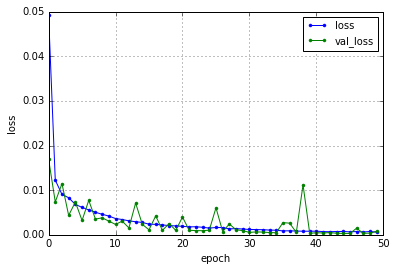

AccX is registed now
Build Complete
(254742,)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=16-SGD
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.5930 - val_loss: 0.3985
Epoch 2/50
1s - loss: 0.2751 - val_loss: 0.1843
Epoch 3/50
1s - loss: 0.1388 - val_loss: 0.1058
Epoch 4/50
1s - loss: 0.0880 - val_loss: 0.0742
Epoch 5/50
1s - loss: 0.0657 - val_loss: 0.0586
Epoch 6/50
0s - loss: 0.0538 - val_loss: 0.0497
Epoch 7/50
0s - loss: 0.0468 - val_loss: 0.0443
Epoch 8/50
0s - loss: 0.0424 - val_loss: 0.0407
Epoch 9/50
0s - loss: 0.0393 - val_loss: 0.0380
Epoch 10/50
0s - loss: 0.0370 - val_loss: 0.0360
Epoch 11/50
0s - loss: 0.0352 - val_loss: 0.0344
Epoch 12/50
0s - loss: 0.0338 - val_loss: 0.0331
Epoch 13/50
0s - loss: 0.0326 - val_loss: 0.0321
Epoch 14/50
0s - loss: 0.0316 - val_loss: 0.0312
Epoch 15/50
0s - loss: 0.0308 - val_loss: 0.0304
Epoch 16/50
1s - loss: 0.0301 - val_loss

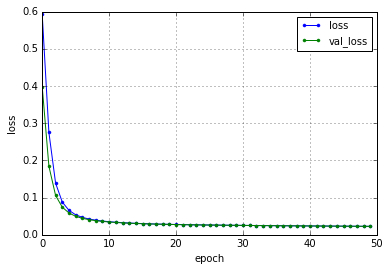

hiden node = 16
-edim=16-Window=256-Overlap=16-Adadelta
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.1034 - val_loss: 0.0247
Epoch 2/50
1s - loss: 0.0226 - val_loss: 0.0161
Epoch 3/50
1s - loss: 0.0151 - val_loss: 0.0169
Epoch 4/50
1s - loss: 0.0132 - val_loss: 0.0100
Epoch 5/50
1s - loss: 0.0115 - val_loss: 0.0140
Epoch 6/50
1s - loss: 0.0110 - val_loss: 0.0080
Epoch 7/50
1s - loss: 0.0100 - val_loss: 0.0185
Epoch 8/50
1s - loss: 0.0099 - val_loss: 0.0093
Epoch 9/50
1s - loss: 0.0097 - val_loss: 0.0144
Epoch 10/50
1s - loss: 0.0097 - val_loss: 0.0094
Epoch 11/50
1s - loss: 0.0095 - val_loss: 0.0070
Epoch 12/50
1s - loss: 0.0088 - val_loss: 0.0072
Epoch 13/50
1s - loss: 0.0086 - val_loss: 0.0084
Epoch 14/50
1s - loss: 0.0081 - val_loss: 0.0094
Epoch 15/50
1s - loss: 0.0079 - val_loss: 0.0134
Epoch 16/50
0s - loss: 0.0078 - val_loss: 0.0144
Epoch 17/50
0s - loss: 0.0074 - val_loss: 0.0276


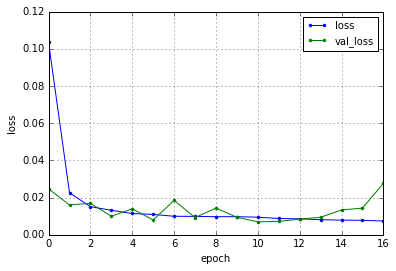

hiden node = 16
-edim=16-Window=256-Overlap=16-Adamax
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0615 - val_loss: 0.0226
Epoch 2/50
0s - loss: 0.0176 - val_loss: 0.0134
Epoch 3/50
0s - loss: 0.0113 - val_loss: 0.0091
Epoch 4/50
0s - loss: 0.0078 - val_loss: 0.0077
Epoch 5/50
0s - loss: 0.0057 - val_loss: 0.0045
Epoch 6/50
0s - loss: 0.0042 - val_loss: 0.0044
Epoch 7/50
0s - loss: 0.0034 - val_loss: 0.0030
Epoch 8/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 9/50
0s - loss: 0.0023 - val_loss: 0.0033
Epoch 10/50
0s - loss: 0.0020 - val_loss: 0.0025
Epoch 11/50
0s - loss: 0.0019 - val_loss: 0.0022
Epoch 12/50
1s - loss: 0.0017 - val_loss: 0.0014
Epoch 13/50
1s - loss: 0.0015 - val_loss: 0.0037
Epoch 14/50
0s - loss: 0.0015 - val_loss: 0.0017
Epoch 15/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0013 - val_loss: 0.0075
Epoch 18/50
1s - loss: 0.0011 - val_loss: 8.8763e-04
Epoch 19/50
0s - lo

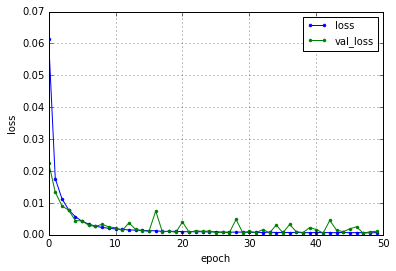

hiden node = 16
-edim=16-Window=256-Overlap=16-Adam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0768 - val_loss: 0.0237
Epoch 2/50
1s - loss: 0.0156 - val_loss: 0.0104
Epoch 3/50
0s - loss: 0.0090 - val_loss: 0.0079
Epoch 4/50
1s - loss: 0.0066 - val_loss: 0.0056
Epoch 5/50
0s - loss: 0.0051 - val_loss: 0.0062
Epoch 6/50
1s - loss: 0.0041 - val_loss: 0.0036
Epoch 7/50
0s - loss: 0.0034 - val_loss: 0.0062
Epoch 8/50
1s - loss: 0.0030 - val_loss: 0.0040
Epoch 9/50
0s - loss: 0.0026 - val_loss: 0.0069
Epoch 10/50
0s - loss: 0.0025 - val_loss: 0.0022
Epoch 11/50
0s - loss: 0.0022 - val_loss: 0.0060
Epoch 12/50
0s - loss: 0.0020 - val_loss: 0.0017
Epoch 13/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0016 - val_loss: 0.0022
Epoch 15/50
0s - loss: 0.0017 - val_loss: 0.0012
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0014 - val_loss: 0.0065
Epoch 18/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 19/50
1s - loss: 0.

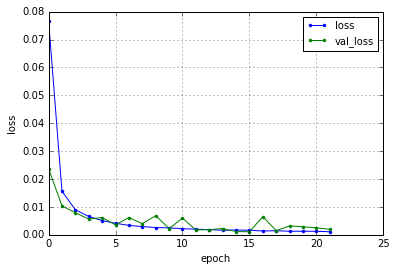

hiden node = 16
-edim=16-Window=256-Overlap=16-Adagrad
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0436 - val_loss: 0.0267
Epoch 2/50
1s - loss: 0.0185 - val_loss: 0.0239
Epoch 3/50
1s - loss: 0.0138 - val_loss: 0.0114
Epoch 4/50
1s - loss: 0.0114 - val_loss: 0.0122
Epoch 5/50
1s - loss: 0.0099 - val_loss: 0.0107
Epoch 6/50
0s - loss: 0.0088 - val_loss: 0.0096
Epoch 7/50
1s - loss: 0.0081 - val_loss: 0.0071
Epoch 8/50
0s - loss: 0.0073 - val_loss: 0.0066
Epoch 9/50
1s - loss: 0.0067 - val_loss: 0.0071
Epoch 10/50
1s - loss: 0.0063 - val_loss: 0.0058
Epoch 11/50
1s - loss: 0.0061 - val_loss: 0.0102
Epoch 12/50
1s - loss: 0.0059 - val_loss: 0.0101
Epoch 13/50
1s - loss: 0.0054 - val_loss: 0.0076
Epoch 14/50
1s - loss: 0.0051 - val_loss: 0.0047
Epoch 15/50
1s - loss: 0.0048 - val_loss: 0.0048
Epoch 16/50
1s - loss: 0.0047 - val_loss: 0.0043
Epoch 17/50
1s - loss: 0.0044 - val_loss: 0.0120
Epoch 18/50
1s - loss: 0.0044 - val_loss: 0.0041
Epoch 19/50
1s - loss:

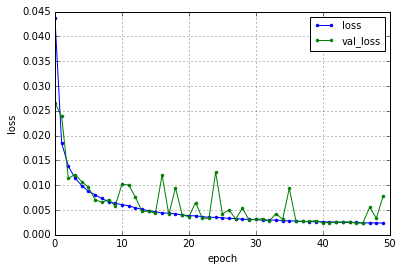

hiden node = 16
-edim=16-Window=256-Overlap=16-RMSprop
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0563 - val_loss: 0.0153
Epoch 2/50
1s - loss: 0.0176 - val_loss: 0.0102
Epoch 3/50
1s - loss: 0.0148 - val_loss: 0.0106
Epoch 4/50
1s - loss: 0.0136 - val_loss: 0.0160
Epoch 5/50
1s - loss: 0.0130 - val_loss: 0.0315
Epoch 6/50
1s - loss: 0.0127 - val_loss: 0.0152
Epoch 7/50
1s - loss: 0.0121 - val_loss: 0.0224
Epoch 8/50
1s - loss: 0.0119 - val_loss: 0.0104


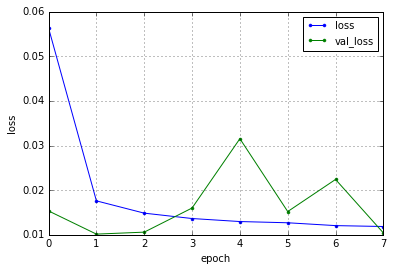

hiden node = 16
-edim=16-Window=256-Overlap=16-Nadam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0524 - val_loss: 0.0194
Epoch 2/50
1s - loss: 0.0179 - val_loss: 0.0137
Epoch 3/50
1s - loss: 0.0151 - val_loss: 0.0175
Epoch 4/50
1s - loss: 0.0135 - val_loss: 0.0120
Epoch 5/50
1s - loss: 0.0119 - val_loss: 0.0160
Epoch 6/50
1s - loss: 0.0107 - val_loss: 0.0254
Epoch 7/50
1s - loss: 0.0095 - val_loss: 0.0074
Epoch 8/50
1s - loss: 0.0083 - val_loss: 0.0051
Epoch 9/50
1s - loss: 0.0076 - val_loss: 0.0087
Epoch 10/50
1s - loss: 0.0071 - val_loss: 0.0300
Epoch 11/50
1s - loss: 0.0063 - val_loss: 0.0045
Epoch 12/50
1s - loss: 0.0060 - val_loss: 0.0068
Epoch 13/50
1s - loss: 0.0055 - val_loss: 0.0033
Epoch 14/50
1s - loss: 0.0053 - val_loss: 0.0034
Epoch 15/50
1s - loss: 0.0048 - val_loss: 0.0024
Epoch 16/50
1s - loss: 0.0044 - val_loss: 0.0054
Epoch 17/50
1s - loss: 0.0044 - val_loss: 0.0026
Epoch 18/50
1s - loss: 0.0039 - val_loss: 0.0025
Epoch 19/50
1s - loss: 0

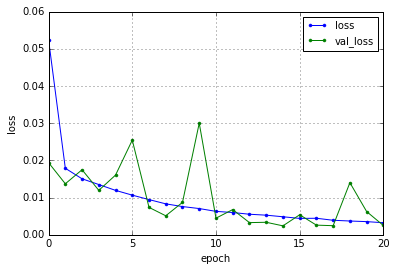

AccX is registed now
Build Complete
(254742,)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=16-SGD
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
2s - loss: 0.6665 - val_loss: 0.5466
Epoch 2/50
2s - loss: 0.4377 - val_loss: 0.3449
Epoch 3/50
2s - loss: 0.2812 - val_loss: 0.2283
Epoch 4/50
2s - loss: 0.1923 - val_loss: 0.1621
Epoch 5/50
1s - loss: 0.1410 - val_loss: 0.1230
Epoch 6/50
1s - loss: 0.1100 - val_loss: 0.0987
Epoch 7/50
1s - loss: 0.0903 - val_loss: 0.0829
Epoch 8/50
1s - loss: 0.0774 - val_loss: 0.0725
Epoch 9/50
1s - loss: 0.0687 - val_loss: 0.0652
Epoch 10/50
1s - loss: 0.0625 - val_loss: 0.0600
Epoch 11/50
1s - loss: 0.0580 - val_loss: 0.0562
Epoch 12/50
1s - loss: 0.0546 - val_loss: 0.0532
Epoch 13/50
1s - loss: 0.0520 - val_loss: 0.0508
Epoch 14/50
2s - loss: 0.0499 - val_loss: 0.0489
Epoch 15/50
2s - loss: 0.0481 - val_loss: 0.0474
Epoch 16/50
2s - loss: 0.0467 - val_loss

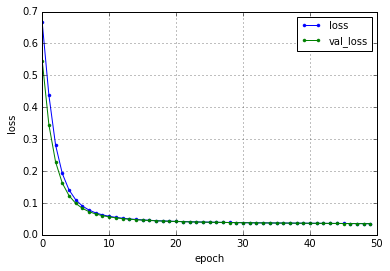

hiden node = 16
-edim=16-Window=512-Overlap=16-Adadelta
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
2s - loss: 0.1171 - val_loss: 0.0444
Epoch 2/50
2s - loss: 0.0367 - val_loss: 0.0340
Epoch 3/50
2s - loss: 0.0290 - val_loss: 0.0232
Epoch 4/50
3s - loss: 0.0227 - val_loss: 0.0200
Epoch 5/50
3s - loss: 0.0194 - val_loss: 0.0194
Epoch 6/50
2s - loss: 0.0180 - val_loss: 0.0162
Epoch 7/50
2s - loss: 0.0166 - val_loss: 0.0202
Epoch 8/50
2s - loss: 0.0156 - val_loss: 0.0117
Epoch 9/50
2s - loss: 0.0149 - val_loss: 0.0161
Epoch 10/50
2s - loss: 0.0142 - val_loss: 0.0194
Epoch 11/50
2s - loss: 0.0138 - val_loss: 0.0120
Epoch 12/50
1s - loss: 0.0133 - val_loss: 0.0111
Epoch 13/50
1s - loss: 0.0132 - val_loss: 0.0133
Epoch 14/50
1s - loss: 0.0124 - val_loss: 0.0099
Epoch 15/50
1s - loss: 0.0123 - val_loss: 0.0099
Epoch 16/50
1s - loss: 0.0121 - val_loss: 0.0113
Epoch 17/50
1s - loss: 0.0117 - val_loss: 0.0119
Epoch 18/50
1s - loss: 0.0118 - val_loss: 0.0123
Epoch 19/50
1s - loss

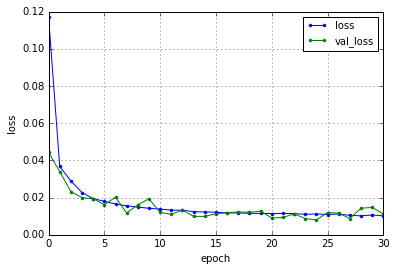

hiden node = 16
-edim=16-Window=512-Overlap=16-Adamax
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0665 - val_loss: 0.0312
Epoch 2/50
2s - loss: 0.0237 - val_loss: 0.0177
Epoch 3/50
2s - loss: 0.0149 - val_loss: 0.0123
Epoch 4/50
2s - loss: 0.0104 - val_loss: 0.0085
Epoch 5/50
1s - loss: 0.0078 - val_loss: 0.0072
Epoch 6/50
1s - loss: 0.0058 - val_loss: 0.0047
Epoch 7/50
2s - loss: 0.0048 - val_loss: 0.0043
Epoch 8/50
2s - loss: 0.0042 - val_loss: 0.0033
Epoch 9/50
2s - loss: 0.0035 - val_loss: 0.0031
Epoch 10/50
2s - loss: 0.0031 - val_loss: 0.0048
Epoch 11/50
2s - loss: 0.0029 - val_loss: 0.0026
Epoch 12/50
1s - loss: 0.0028 - val_loss: 0.0023
Epoch 13/50
1s - loss: 0.0026 - val_loss: 0.0023
Epoch 14/50
1s - loss: 0.0026 - val_loss: 0.0025
Epoch 15/50
1s - loss: 0.0024 - val_loss: 0.0020
Epoch 16/50
1s - loss: 0.0023 - val_loss: 0.0026
Epoch 17/50
2s - loss: 0.0022 - val_loss: 0.0020
Epoch 18/50
2s - loss: 0.0022 - val_loss: 0.0057
Epoch 19/50
2s - loss: 

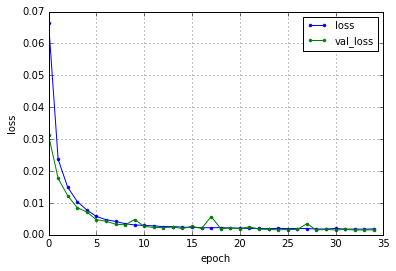

hiden node = 16
-edim=16-Window=512-Overlap=16-Adam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0754 - val_loss: 0.0284
Epoch 2/50
1s - loss: 0.0203 - val_loss: 0.0145
Epoch 3/50
1s - loss: 0.0123 - val_loss: 0.0116
Epoch 4/50
2s - loss: 0.0090 - val_loss: 0.0071
Epoch 5/50
2s - loss: 0.0069 - val_loss: 0.0053
Epoch 6/50
2s - loss: 0.0056 - val_loss: 0.0046
Epoch 7/50
2s - loss: 0.0049 - val_loss: 0.0040
Epoch 8/50
2s - loss: 0.0042 - val_loss: 0.0037
Epoch 9/50
2s - loss: 0.0041 - val_loss: 0.0045
Epoch 10/50
2s - loss: 0.0038 - val_loss: 0.0049
Epoch 11/50
2s - loss: 0.0033 - val_loss: 0.0029
Epoch 12/50
2s - loss: 0.0031 - val_loss: 0.0024
Epoch 13/50
2s - loss: 0.0030 - val_loss: 0.0032
Epoch 14/50
2s - loss: 0.0028 - val_loss: 0.0022
Epoch 15/50
2s - loss: 0.0027 - val_loss: 0.0022
Epoch 16/50
2s - loss: 0.0026 - val_loss: 0.0022
Epoch 17/50
2s - loss: 0.0024 - val_loss: 0.0024
Epoch 18/50
2s - loss: 0.0027 - val_loss: 0.0032
Epoch 19/50
2s - loss: 0.

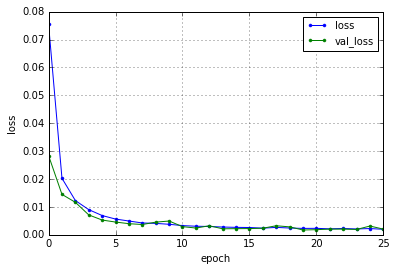

hiden node = 16
-edim=16-Window=512-Overlap=16-Adagrad
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
2s - loss: 0.0546 - val_loss: 0.0324
Epoch 2/50
2s - loss: 0.0265 - val_loss: 0.0273
Epoch 3/50
1s - loss: 0.0194 - val_loss: 0.0155
Epoch 4/50
1s - loss: 0.0158 - val_loss: 0.0143
Epoch 5/50
2s - loss: 0.0141 - val_loss: 0.0119
Epoch 6/50
1s - loss: 0.0126 - val_loss: 0.0142
Epoch 7/50
1s - loss: 0.0118 - val_loss: 0.0102
Epoch 8/50
2s - loss: 0.0110 - val_loss: 0.0097
Epoch 9/50
1s - loss: 0.0100 - val_loss: 0.0131
Epoch 10/50
2s - loss: 0.0096 - val_loss: 0.0083
Epoch 11/50
2s - loss: 0.0090 - val_loss: 0.0080
Epoch 12/50
2s - loss: 0.0085 - val_loss: 0.0075
Epoch 13/50
2s - loss: 0.0083 - val_loss: 0.0097
Epoch 14/50
2s - loss: 0.0078 - val_loss: 0.0073
Epoch 15/50
2s - loss: 0.0075 - val_loss: 0.0084
Epoch 16/50
2s - loss: 0.0071 - val_loss: 0.0068
Epoch 17/50
1s - loss: 0.0069 - val_loss: 0.0062
Epoch 18/50
1s - loss: 0.0067 - val_loss: 0.0081
Epoch 19/50
1s - loss:

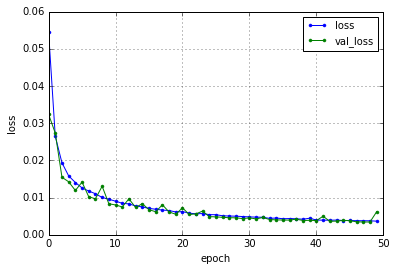

hiden node = 16
-edim=16-Window=512-Overlap=16-RMSprop
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0658 - val_loss: 0.0516
Epoch 2/50
1s - loss: 0.0252 - val_loss: 0.0210
Epoch 3/50
1s - loss: 0.0227 - val_loss: 0.0401
Epoch 4/50
2s - loss: 0.0213 - val_loss: 0.0147
Epoch 5/50
2s - loss: 0.0201 - val_loss: 0.0153
Epoch 6/50
1s - loss: 0.0194 - val_loss: 0.0138
Epoch 7/50
2s - loss: 0.0188 - val_loss: 0.0212
Epoch 8/50
2s - loss: 0.0180 - val_loss: 0.0136
Epoch 9/50
2s - loss: 0.0174 - val_loss: 0.0207
Epoch 10/50
2s - loss: 0.0169 - val_loss: 0.0105
Epoch 11/50
2s - loss: 0.0164 - val_loss: 0.0180
Epoch 12/50
2s - loss: 0.0159 - val_loss: 0.0141
Epoch 13/50
2s - loss: 0.0156 - val_loss: 0.0143
Epoch 14/50
2s - loss: 0.0150 - val_loss: 0.0181
Epoch 15/50
2s - loss: 0.0148 - val_loss: 0.0111
Epoch 16/50
2s - loss: 0.0145 - val_loss: 0.0128


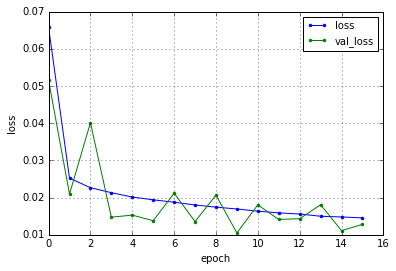

hiden node = 16
-edim=16-Window=512-Overlap=16-Nadam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
2s - loss: 0.0670 - val_loss: 0.0388
Epoch 2/50
2s - loss: 0.0300 - val_loss: 0.0222
Epoch 3/50
2s - loss: 0.0269 - val_loss: 0.0148
Epoch 4/50
2s - loss: 0.0209 - val_loss: 0.0135
Epoch 5/50
2s - loss: 0.0173 - val_loss: 0.0151
Epoch 6/50
2s - loss: 0.0147 - val_loss: 0.0181
Epoch 7/50
2s - loss: 0.0130 - val_loss: 0.0174
Epoch 8/50
2s - loss: 0.0122 - val_loss: 0.0099
Epoch 9/50
2s - loss: 0.0113 - val_loss: 0.0089
Epoch 10/50
2s - loss: 0.0109 - val_loss: 0.0136
Epoch 11/50
2s - loss: 0.0103 - val_loss: 0.0080
Epoch 12/50
2s - loss: 0.0098 - val_loss: 0.0074
Epoch 13/50
2s - loss: 0.0093 - val_loss: 0.0069
Epoch 14/50
2s - loss: 0.0090 - val_loss: 0.0068
Epoch 15/50
2s - loss: 0.0085 - val_loss: 0.0072
Epoch 16/50
2s - loss: 0.0083 - val_loss: 0.0126
Epoch 17/50
2s - loss: 0.0077 - val_loss: 0.0080
Epoch 18/50
2s - loss: 0.0073 - val_loss: 0.0048
Epoch 19/50
2s - loss: 0

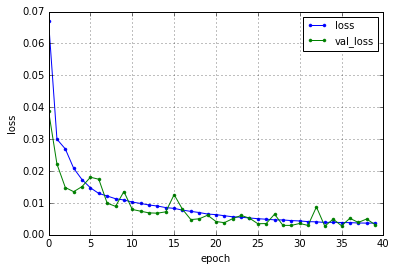

AccX is registed now
Build Complete
(254742,)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=16-SGD
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.6994 - val_loss: 0.6354
Epoch 2/50
2s - loss: 0.5690 - val_loss: 0.5060
Epoch 3/50
2s - loss: 0.4516 - val_loss: 0.4015
Epoch 4/50
2s - loss: 0.3603 - val_loss: 0.3227
Epoch 5/50
2s - loss: 0.2920 - val_loss: 0.2639
Epoch 6/50
1s - loss: 0.2408 - val_loss: 0.2196
Epoch 7/50
2s - loss: 0.2020 - val_loss: 0.1858
Epoch 8/50
2s - loss: 0.1722 - val_loss: 0.1596
Epoch 9/50
1s - loss: 0.1489 - val_loss: 0.1391
Epoch 10/50
2s - loss: 0.1308 - val_loss: 0.1231
Epoch 11/50
2s - loss: 0.1165 - val_loss: 0.1104
Epoch 12/50
2s - loss: 0.1052 - val_loss: 0.1003
Epoch 13/50
2s - loss: 0.0961 - val_loss: 0.0921
Epoch 14/50
2s - loss: 0.0887 - val_loss: 0.0855
Epoch 15/50
2s - loss: 0.0828 - val_loss: 0.0801
Epoch 16/50
2s - loss: 0.0778 - val_lo

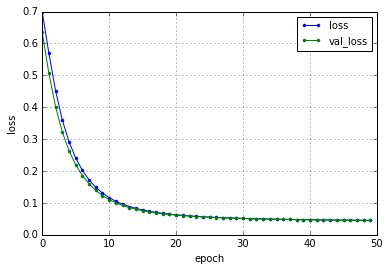

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adadelta
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.1265 - val_loss: 0.0454
Epoch 2/50
2s - loss: 0.0454 - val_loss: 0.0545
Epoch 3/50
2s - loss: 0.0419 - val_loss: 0.0414
Epoch 4/50
1s - loss: 0.0390 - val_loss: 0.0380
Epoch 5/50
1s - loss: 0.0361 - val_loss: 0.0323
Epoch 6/50
2s - loss: 0.0333 - val_loss: 0.0305
Epoch 7/50
1s - loss: 0.0312 - val_loss: 0.0304
Epoch 8/50
1s - loss: 0.0289 - val_loss: 0.0377
Epoch 9/50
2s - loss: 0.0276 - val_loss: 0.0239
Epoch 10/50
2s - loss: 0.0267 - val_loss: 0.0215
Epoch 11/50
2s - loss: 0.0262 - val_loss: 0.0232
Epoch 12/50
2s - loss: 0.0248 - val_loss: 0.0295
Epoch 13/50
2s - loss: 0.0236 - val_loss: 0.0247
Epoch 14/50
1s - loss: 0.0230 - val_loss: 0.0197
Epoch 15/50
1s - loss: 0.0220 - val_loss: 0.0267
Epoch 16/50
1s - loss: 0.0218 - val_loss: 0.0250
Epoch 17/50
2s - loss: 0.0213 - val_loss: 0.0210
Epoch 18/50
2s - loss: 0.0210 - val_loss: 0.0205
Epoch 19/50
2s - los

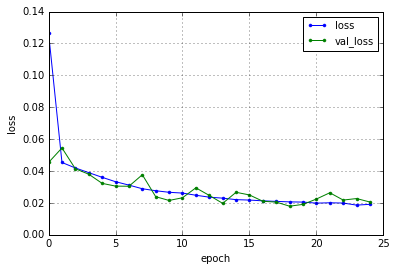

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adamax
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0690 - val_loss: 0.0386
Epoch 2/50
1s - loss: 0.0333 - val_loss: 0.0275
Epoch 3/50
2s - loss: 0.0219 - val_loss: 0.0193
Epoch 4/50
2s - loss: 0.0154 - val_loss: 0.0148
Epoch 5/50
1s - loss: 0.0120 - val_loss: 0.0098
Epoch 6/50
1s - loss: 0.0098 - val_loss: 0.0085
Epoch 7/50
1s - loss: 0.0081 - val_loss: 0.0069
Epoch 8/50
1s - loss: 0.0070 - val_loss: 0.0112
Epoch 9/50
1s - loss: 0.0064 - val_loss: 0.0062
Epoch 10/50
1s - loss: 0.0058 - val_loss: 0.0051
Epoch 11/50
1s - loss: 0.0057 - val_loss: 0.0061
Epoch 12/50
1s - loss: 0.0053 - val_loss: 0.0046
Epoch 13/50
1s - loss: 0.0051 - val_loss: 0.0049
Epoch 14/50
2s - loss: 0.0048 - val_loss: 0.0049
Epoch 15/50
2s - loss: 0.0050 - val_loss: 0.0043
Epoch 16/50
2s - loss: 0.0045 - val_loss: 0.0043
Epoch 17/50
1s - loss: 0.0046 - val_loss: 0.0055
Epoch 18/50
1s - loss: 0.0047 - val_loss: 0.0037
Epoch 19/50
1s - loss:

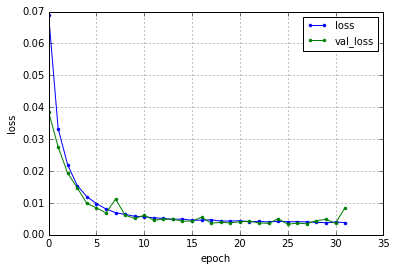

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0806 - val_loss: 0.0360
Epoch 2/50
1s - loss: 0.0291 - val_loss: 0.0295
Epoch 3/50
1s - loss: 0.0184 - val_loss: 0.0160
Epoch 4/50
1s - loss: 0.0139 - val_loss: 0.0144
Epoch 5/50
1s - loss: 0.0115 - val_loss: 0.0095
Epoch 6/50
1s - loss: 0.0097 - val_loss: 0.0085
Epoch 7/50
1s - loss: 0.0088 - val_loss: 0.0077
Epoch 8/50
1s - loss: 0.0078 - val_loss: 0.0081
Epoch 9/50
1s - loss: 0.0073 - val_loss: 0.0069
Epoch 10/50
1s - loss: 0.0070 - val_loss: 0.0063
Epoch 11/50
1s - loss: 0.0065 - val_loss: 0.0054
Epoch 12/50
2s - loss: 0.0060 - val_loss: 0.0054
Epoch 13/50
1s - loss: 0.0058 - val_loss: 0.0101
Epoch 14/50
2s - loss: 0.0056 - val_loss: 0.0107
Epoch 15/50
2s - loss: 0.0055 - val_loss: 0.0042
Epoch 16/50
2s - loss: 0.0051 - val_loss: 0.0049
Epoch 17/50
2s - loss: 0.0054 - val_loss: 0.0048
Epoch 18/50
1s - loss: 0.0051 - val_loss: 0.0048
Epoch 19/50
1s - loss: 0

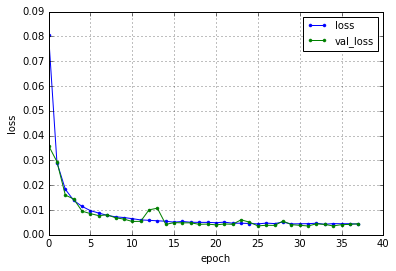

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adagrad
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0724 - val_loss: 0.0394
Epoch 2/50
1s - loss: 0.0394 - val_loss: 0.0380
Epoch 3/50
1s - loss: 0.0337 - val_loss: 0.0284
Epoch 4/50
1s - loss: 0.0280 - val_loss: 0.0405
Epoch 5/50
1s - loss: 0.0246 - val_loss: 0.0205
Epoch 6/50
1s - loss: 0.0222 - val_loss: 0.0208
Epoch 7/50
1s - loss: 0.0205 - val_loss: 0.0184
Epoch 8/50
1s - loss: 0.0193 - val_loss: 0.0164
Epoch 9/50
1s - loss: 0.0175 - val_loss: 0.0163
Epoch 10/50
1s - loss: 0.0165 - val_loss: 0.0206
Epoch 11/50
1s - loss: 0.0158 - val_loss: 0.0144
Epoch 12/50
1s - loss: 0.0145 - val_loss: 0.0127
Epoch 13/50
1s - loss: 0.0143 - val_loss: 0.0151
Epoch 14/50
1s - loss: 0.0138 - val_loss: 0.0118
Epoch 15/50
1s - loss: 0.0130 - val_loss: 0.0129
Epoch 16/50
1s - loss: 0.0127 - val_loss: 0.0133
Epoch 17/50
1s - loss: 0.0125 - val_loss: 0.0108
Epoch 18/50
1s - loss: 0.0121 - val_loss: 0.0113
Epoch 19/50
1s - loss

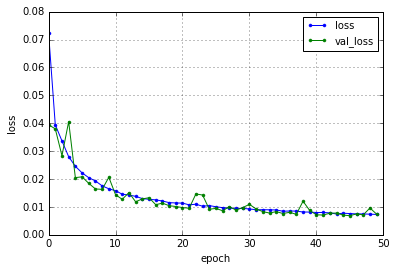

hiden node = 16
-edim=16-Window=1024-Overlap=16-RMSprop
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0833 - val_loss: 0.1039
Epoch 2/50
2s - loss: 0.0440 - val_loss: 0.0340
Epoch 3/50
2s - loss: 0.0372 - val_loss: 0.0365
Epoch 4/50
2s - loss: 0.0346 - val_loss: 0.0492
Epoch 5/50
1s - loss: 0.0329 - val_loss: 0.0375
Epoch 6/50
1s - loss: 0.0314 - val_loss: 0.0206
Epoch 7/50
2s - loss: 0.0303 - val_loss: 0.0258
Epoch 8/50
1s - loss: 0.0292 - val_loss: 0.0193
Epoch 9/50
2s - loss: 0.0278 - val_loss: 0.0260
Epoch 10/50
2s - loss: 0.0272 - val_loss: 0.0257
Epoch 11/50
2s - loss: 0.0263 - val_loss: 0.0237
Epoch 12/50
2s - loss: 0.0255 - val_loss: 0.0207
Epoch 13/50
2s - loss: 0.0244 - val_loss: 0.0367
Epoch 14/50
2s - loss: 0.0241 - val_loss: 0.0161
Epoch 15/50
2s - loss: 0.0234 - val_loss: 0.0163
Epoch 16/50
2s - loss: 0.0230 - val_loss: 0.0254
Epoch 17/50
2s - loss: 0.0223 - val_loss: 0.0202
Epoch 18/50
1s - loss: 0.0222 - val_loss: 0.0420
Epoch 19/50
1s - loss

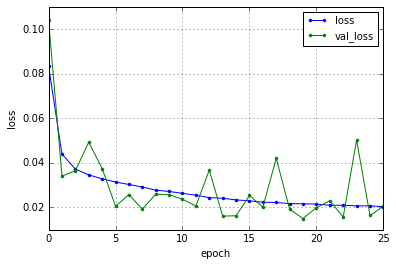

hiden node = 16
-edim=16-Window=1024-Overlap=16-Nadam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0966 - val_loss: 0.0611
Epoch 2/50
2s - loss: 0.0553 - val_loss: 0.0464
Epoch 3/50
2s - loss: 0.0504 - val_loss: 0.0361
Epoch 4/50
2s - loss: 0.0469 - val_loss: 0.0438
Epoch 5/50
2s - loss: 0.0393 - val_loss: 0.0446
Epoch 6/50
2s - loss: 0.0390 - val_loss: 0.0519
Epoch 7/50
2s - loss: 0.0363 - val_loss: 0.0253
Epoch 8/50
2s - loss: 0.0321 - val_loss: 0.0307
Epoch 9/50
2s - loss: 0.0306 - val_loss: 0.0457
Epoch 10/50
2s - loss: 0.0323 - val_loss: 0.0264
Epoch 11/50
2s - loss: 0.0282 - val_loss: 0.0487
Epoch 12/50
1s - loss: 0.0371 - val_loss: 0.0259
Epoch 13/50
2s - loss: 0.0299 - val_loss: 0.0235
Epoch 14/50
2s - loss: 0.0228 - val_loss: 0.0206
Epoch 15/50
2s - loss: 0.0211 - val_loss: 0.0237
Epoch 16/50
2s - loss: 0.0189 - val_loss: 0.0161
Epoch 17/50
2s - loss: 0.0184 - val_loss: 0.0161
Epoch 18/50
2s - loss: 0.0185 - val_loss: 0.0279
Epoch 19/50
2s - loss: 

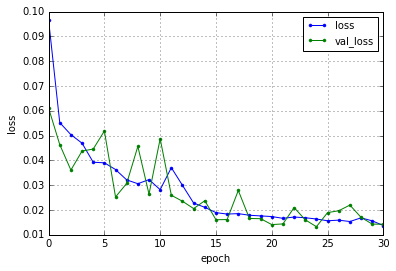

AccX is registed now
Build Complete
(254742,)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=16-SGD
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.7298 - val_loss: 0.6969
Epoch 2/50
3s - loss: 0.6578 - val_loss: 0.6186
Epoch 3/50
4s - loss: 0.5827 - val_loss: 0.5481
Epoch 4/50
3s - loss: 0.5169 - val_loss: 0.4871
Epoch 5/50
3s - loss: 0.4602 - val_loss: 0.4344
Epoch 6/50
3s - loss: 0.4113 - val_loss: 0.3892
Epoch 7/50
3s - loss: 0.3692 - val_loss: 0.3501
Epoch 8/50
3s - loss: 0.3329 - val_loss: 0.3164
Epoch 9/50
3s - loss: 0.3016 - val_loss: 0.2873
Epoch 10/50
3s - loss: 0.2743 - val_loss: 0.2618
Epoch 11/50
4s - loss: 0.2505 - val_loss: 0.2396
Epoch 12/50
3s - loss: 0.2297 - val_loss: 0.2201
Epoch 13/50
4s - loss: 0.2114 - val_loss: 0.2030
Epoch 14/50
3s - loss: 0.1953 - val_loss: 0.1879
Epoch 15/50
3s - loss: 0.1812 - val_loss: 0.1747
Epoch 16/50
3s - loss: 0.1688 - val_lo

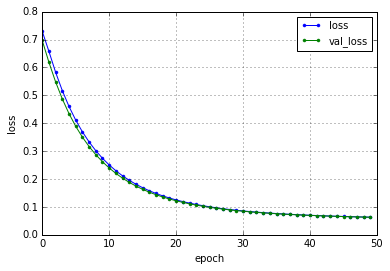

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adadelta
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.1518 - val_loss: 0.0585
Epoch 2/50
3s - loss: 0.0558 - val_loss: 0.0583
Epoch 3/50
3s - loss: 0.0522 - val_loss: 0.0481
Epoch 4/50
3s - loss: 0.0499 - val_loss: 0.0548
Epoch 5/50
3s - loss: 0.0482 - val_loss: 0.0438
Epoch 6/50
3s - loss: 0.0463 - val_loss: 0.0497
Epoch 7/50
3s - loss: 0.0459 - val_loss: 0.0404
Epoch 8/50
2s - loss: 0.0446 - val_loss: 0.0415
Epoch 9/50
2s - loss: 0.0429 - val_loss: 0.0389
Epoch 10/50
2s - loss: 0.0415 - val_loss: 0.0361
Epoch 11/50
2s - loss: 0.0402 - val_loss: 0.0584
Epoch 12/50
2s - loss: 0.0395 - val_loss: 0.0351
Epoch 13/50
3s - loss: 0.0375 - val_loss: 0.0350
Epoch 14/50
3s - loss: 0.0365 - val_loss: 0.0436
Epoch 15/50
3s - loss: 0.0353 - val_loss: 0.0342
Epoch 16/50
3s - loss: 0.0343 - val_loss: 0.0299
Epoch 17/50
3s - loss: 0.0341 - val_loss: 0.0287
Epoch 18/50
3s - loss: 0.0329 - val_loss: 0.0316
Epoch 19/50
3s - los

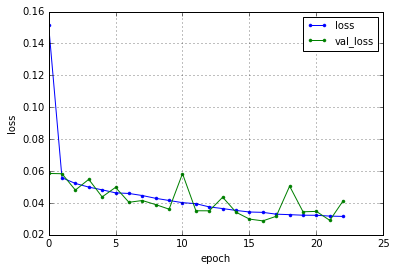

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adamax
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0799 - val_loss: 0.0445
Epoch 2/50
3s - loss: 0.0396 - val_loss: 0.0336
Epoch 3/50
3s - loss: 0.0295 - val_loss: 0.0248
Epoch 4/50
3s - loss: 0.0233 - val_loss: 0.0260
Epoch 5/50
3s - loss: 0.0193 - val_loss: 0.0161
Epoch 6/50
3s - loss: 0.0158 - val_loss: 0.0137
Epoch 7/50
3s - loss: 0.0141 - val_loss: 0.0125
Epoch 8/50
3s - loss: 0.0127 - val_loss: 0.0166
Epoch 9/50
3s - loss: 0.0127 - val_loss: 0.0147
Epoch 10/50
3s - loss: 0.0113 - val_loss: 0.0107
Epoch 11/50
3s - loss: 0.0112 - val_loss: 0.0095
Epoch 12/50
3s - loss: 0.0111 - val_loss: 0.0096
Epoch 13/50
3s - loss: 0.0108 - val_loss: 0.0118
Epoch 14/50
3s - loss: 0.0104 - val_loss: 0.0091
Epoch 15/50
3s - loss: 0.0101 - val_loss: 0.0095
Epoch 16/50
3s - loss: 0.0098 - val_loss: 0.0086
Epoch 17/50
3s - loss: 0.0098 - val_loss: 0.0099
Epoch 18/50
3s - loss: 0.0102 - val_loss: 0.0085
Epoch 19/50
3s - loss:

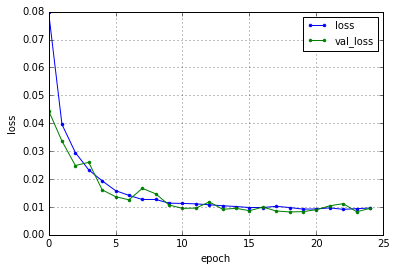

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0952 - val_loss: 0.0451
Epoch 2/50
3s - loss: 0.0467 - val_loss: 0.0407
Epoch 3/50
3s - loss: 0.0402 - val_loss: 0.0318
Epoch 4/50
3s - loss: 0.0352 - val_loss: 0.0307
Epoch 5/50
3s - loss: 0.0339 - val_loss: 0.0261
Epoch 6/50
3s - loss: 0.0255 - val_loss: 0.0283
Epoch 7/50
3s - loss: 0.0259 - val_loss: 0.0216
Epoch 8/50
3s - loss: 0.0225 - val_loss: 0.0195
Epoch 9/50
3s - loss: 0.0222 - val_loss: 0.0187
Epoch 10/50
3s - loss: 0.0203 - val_loss: 0.0187
Epoch 11/50
3s - loss: 0.0195 - val_loss: 0.0178
Epoch 12/50
3s - loss: 0.0221 - val_loss: 0.0198
Epoch 13/50
3s - loss: 0.0198 - val_loss: 0.0176
Epoch 14/50
3s - loss: 0.0197 - val_loss: 0.0194
Epoch 15/50
3s - loss: 0.0174 - val_loss: 0.0174
Epoch 16/50
3s - loss: 0.0176 - val_loss: 0.0203
Epoch 17/50
3s - loss: 0.0182 - val_loss: 0.0166
Epoch 18/50
3s - loss: 0.0174 - val_loss: 0.0171
Epoch 19/50
3s - loss: 0

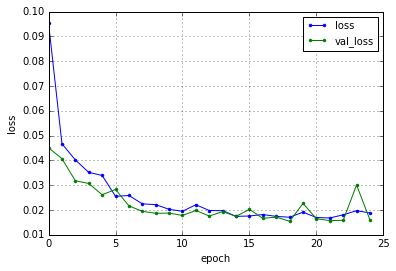

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adagrad
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0952 - val_loss: 0.0671
Epoch 2/50
3s - loss: 0.0576 - val_loss: 0.0464
Epoch 3/50
3s - loss: 0.0429 - val_loss: 0.0358
Epoch 4/50
3s - loss: 0.0369 - val_loss: 0.0380
Epoch 5/50
3s - loss: 0.0338 - val_loss: 0.0357
Epoch 6/50
3s - loss: 0.0315 - val_loss: 0.0284
Epoch 7/50
3s - loss: 0.0301 - val_loss: 0.0291
Epoch 8/50
3s - loss: 0.0289 - val_loss: 0.0265
Epoch 9/50
3s - loss: 0.0274 - val_loss: 0.0262
Epoch 10/50
3s - loss: 0.0267 - val_loss: 0.0250
Epoch 11/50
3s - loss: 0.0259 - val_loss: 0.0246
Epoch 12/50
3s - loss: 0.0254 - val_loss: 0.0230
Epoch 13/50
3s - loss: 0.0247 - val_loss: 0.0345
Epoch 14/50
3s - loss: 0.0240 - val_loss: 0.0212
Epoch 15/50
3s - loss: 0.0232 - val_loss: 0.0292
Epoch 16/50
3s - loss: 0.0229 - val_loss: 0.0203
Epoch 17/50
3s - loss: 0.0227 - val_loss: 0.0203
Epoch 18/50
3s - loss: 0.0220 - val_loss: 0.0269
Epoch 19/50
3s - loss

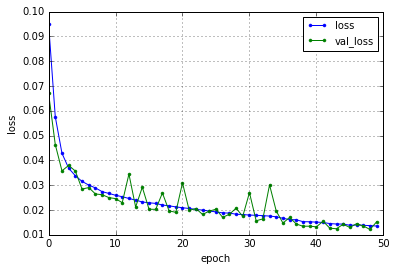

hiden node = 16
-edim=16-Window=2048-Overlap=16-RMSprop
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.1041 - val_loss: 0.0630
Epoch 2/50
3s - loss: 0.0643 - val_loss: 0.0556
Epoch 3/50
3s - loss: 0.0582 - val_loss: 0.0539
Epoch 4/50
3s - loss: 0.0534 - val_loss: 0.0435
Epoch 5/50
3s - loss: 0.0489 - val_loss: 0.0438
Epoch 6/50
2s - loss: 0.0470 - val_loss: 0.0378
Epoch 7/50
3s - loss: 0.0449 - val_loss: 0.0438
Epoch 8/50
3s - loss: 0.0434 - val_loss: 0.0524
Epoch 9/50
3s - loss: 0.0426 - val_loss: 0.0369
Epoch 10/50
3s - loss: 0.0415 - val_loss: 0.0362
Epoch 11/50
3s - loss: 0.0401 - val_loss: 0.0317
Epoch 12/50
3s - loss: 0.0388 - val_loss: 0.0400
Epoch 13/50
3s - loss: 0.0376 - val_loss: 0.0415
Epoch 14/50
3s - loss: 0.0361 - val_loss: 0.0301
Epoch 15/50
3s - loss: 0.0351 - val_loss: 0.0309
Epoch 16/50
3s - loss: 0.0345 - val_loss: 0.0555
Epoch 17/50
3s - loss: 0.0342 - val_loss: 0.0435
Epoch 18/50
3s - loss: 0.0336 - val_loss: 0.0393
Epoch 19/50
3s - loss

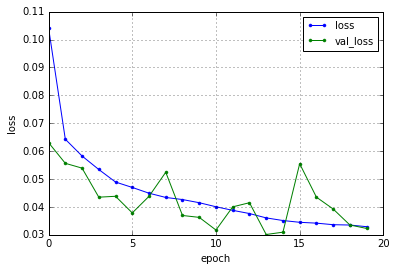

hiden node = 16
-edim=16-Window=2048-Overlap=16-Nadam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.1183 - val_loss: 0.0892
Epoch 2/50
3s - loss: 0.0783 - val_loss: 0.0677
Epoch 3/50
3s - loss: 0.0690 - val_loss: 0.0628
Epoch 4/50
3s - loss: 0.0616 - val_loss: 0.0680
Epoch 5/50
3s - loss: 0.0562 - val_loss: 0.0529
Epoch 6/50
3s - loss: 0.0553 - val_loss: 0.0476
Epoch 7/50
3s - loss: 0.0580 - val_loss: 0.0511
Epoch 8/50
3s - loss: 0.0460 - val_loss: 0.0435
Epoch 9/50
3s - loss: 0.0627 - val_loss: 0.0609
Epoch 10/50
3s - loss: 0.0590 - val_loss: 0.0500
Epoch 11/50
3s - loss: 0.0636 - val_loss: 0.0561
Epoch 12/50
3s - loss: 0.0611 - val_loss: 0.0580
Epoch 13/50
3s - loss: 0.0616 - val_loss: 0.0629
Epoch 14/50
3s - loss: 0.0622 - val_loss: 0.0627


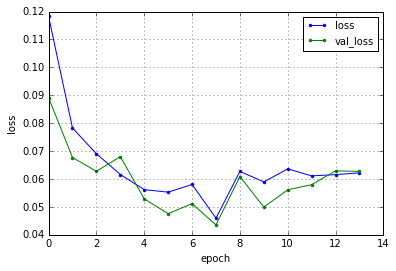

AccX is registed now
Build Complete
(254742,)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=16-SGD
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.7435 - val_loss: 0.7273
Epoch 2/50
7s - loss: 0.7070 - val_loss: 0.6861
Epoch 3/50
6s - loss: 0.6658 - val_loss: 0.6457
Epoch 4/50
7s - loss: 0.6267 - val_loss: 0.6080
Epoch 5/50
7s - loss: 0.5903 - val_loss: 0.5729
Epoch 6/50
7s - loss: 0.5565 - val_loss: 0.5403
Epoch 7/50
7s - loss: 0.5251 - val_loss: 0.5102
Epoch 8/50
7s - loss: 0.4960 - val_loss: 0.4822
Epoch 9/50
7s - loss: 0.4691 - val_loss: 0.4563
Epoch 10/50
7s - loss: 0.4442 - val_loss: 0.4323
Epoch 11/50
7s - loss: 0.4210 - val_loss: 0.4100
Epoch 12/50
6s - loss: 0.3996 - val_loss: 0.3893
Epoch 13/50
7s - loss: 0.3797 - val_loss: 0.3701
Epoch 14/50
6s - loss: 0.3611 - val_loss: 0.3523
Epoch 15/50
6s - loss: 0.3439 - val_loss: 0.3357
Epoch 16/50
6s - loss: 0.3278 - val_lo

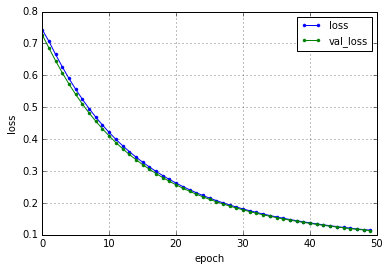

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adadelta
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.2020 - val_loss: 0.0793
Epoch 2/50
6s - loss: 0.0735 - val_loss: 0.0900
Epoch 3/50
6s - loss: 0.0672 - val_loss: 0.0784
Epoch 4/50
6s - loss: 0.0638 - val_loss: 0.0597
Epoch 5/50
7s - loss: 0.0608 - val_loss: 0.0724
Epoch 6/50
7s - loss: 0.0584 - val_loss: 0.0577
Epoch 7/50
6s - loss: 0.0566 - val_loss: 0.0530
Epoch 8/50
7s - loss: 0.0548 - val_loss: 0.0603
Epoch 9/50
7s - loss: 0.0540 - val_loss: 0.0501
Epoch 10/50
7s - loss: 0.0529 - val_loss: 0.0588
Epoch 11/50
6s - loss: 0.0523 - val_loss: 0.0480
Epoch 12/50
6s - loss: 0.0510 - val_loss: 0.0479
Epoch 13/50
7s - loss: 0.0505 - val_loss: 0.0597
Epoch 14/50
7s - loss: 0.0495 - val_loss: 0.0497
Epoch 15/50
7s - loss: 0.0491 - val_loss: 0.0484
Epoch 16/50
7s - loss: 0.0488 - val_loss: 0.0467
Epoch 17/50
7s - loss: 0.0481 - val_loss: 0.0499
Epoch 18/50
8s - loss: 0.0477 - val_loss: 0.0454
Epoch 19/50
7s - los

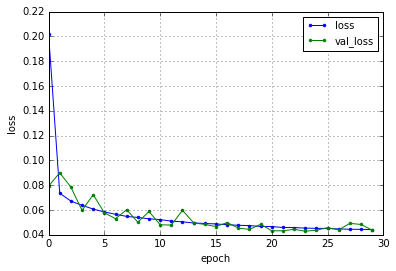

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adamax
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.0951 - val_loss: 0.0546
Epoch 2/50
7s - loss: 0.0490 - val_loss: 0.0444
Epoch 3/50
7s - loss: 0.0413 - val_loss: 0.0408
Epoch 4/50
8s - loss: 0.0343 - val_loss: 0.0324
Epoch 5/50
7s - loss: 0.0293 - val_loss: 0.0251
Epoch 6/50
7s - loss: 0.0259 - val_loss: 0.0230
Epoch 7/50
8s - loss: 0.0250 - val_loss: 0.0234
Epoch 8/50
7s - loss: 0.0235 - val_loss: 0.0207
Epoch 9/50
7s - loss: 0.0229 - val_loss: 0.0204
Epoch 10/50
6s - loss: 0.0223 - val_loss: 0.0204
Epoch 11/50
7s - loss: 0.0212 - val_loss: 0.0204
Epoch 12/50
6s - loss: 0.0202 - val_loss: 0.0184
Epoch 13/50
6s - loss: 0.0202 - val_loss: 0.0190
Epoch 14/50
7s - loss: 0.0202 - val_loss: 0.0185
Epoch 15/50
6s - loss: 0.0200 - val_loss: 0.0180
Epoch 16/50
6s - loss: 0.0194 - val_loss: 0.0215
Epoch 17/50
6s - loss: 0.0195 - val_loss: 0.0187
Epoch 18/50
6s - loss: 0.0191 - val_loss: 0.0239
Epoch 19/50
7s - loss:

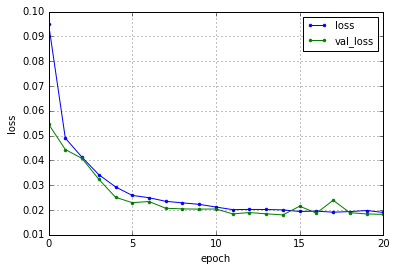

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.1234 - val_loss: 0.0758
Epoch 2/50
7s - loss: 0.0684 - val_loss: 0.0648
Epoch 3/50
7s - loss: 0.0617 - val_loss: 0.0545
Epoch 4/50
7s - loss: 0.0559 - val_loss: 0.0553
Epoch 5/50
7s - loss: 0.0543 - val_loss: 0.0492
Epoch 6/50
7s - loss: 0.0518 - val_loss: 0.0487
Epoch 7/50
7s - loss: 0.0502 - val_loss: 0.0506
Epoch 8/50
7s - loss: 0.0476 - val_loss: 0.0439
Epoch 9/50
7s - loss: 0.0466 - val_loss: 0.0529
Epoch 10/50
6s - loss: 0.0459 - val_loss: 0.0475
Epoch 11/50
7s - loss: 0.0443 - val_loss: 0.0453
Epoch 12/50
7s - loss: 0.0442 - val_loss: 0.0442
Epoch 13/50
7s - loss: 0.0417 - val_loss: 0.0395
Epoch 14/50
8s - loss: 0.0402 - val_loss: 0.0409
Epoch 15/50
7s - loss: 0.0458 - val_loss: 0.0483
Epoch 16/50
7s - loss: 0.0469 - val_loss: 0.0452
Epoch 17/50
9s - loss: 0.0450 - val_loss: 0.0475
Epoch 18/50
8s - loss: 0.0448 - val_loss: 0.0426
Epoch 19/50
7s - loss: 0

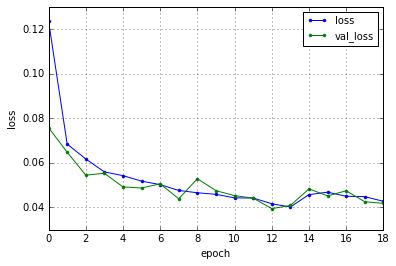

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adagrad
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
8s - loss: 0.1192 - val_loss: 0.0925
Epoch 2/50
7s - loss: 0.0867 - val_loss: 0.0815
Epoch 3/50
8s - loss: 0.0743 - val_loss: 0.0692
Epoch 4/50
9s - loss: 0.0666 - val_loss: 0.0616
Epoch 5/50
8s - loss: 0.0604 - val_loss: 0.0584
Epoch 6/50
7s - loss: 0.0574 - val_loss: 0.0562
Epoch 7/50
7s - loss: 0.0562 - val_loss: 0.0540
Epoch 8/50
7s - loss: 0.0536 - val_loss: 0.0521
Epoch 9/50
7s - loss: 0.0522 - val_loss: 0.0523
Epoch 10/50
7s - loss: 0.0505 - val_loss: 0.0547
Epoch 11/50
6s - loss: 0.0494 - val_loss: 0.0486
Epoch 12/50
7s - loss: 0.0483 - val_loss: 0.0478
Epoch 13/50
7s - loss: 0.0469 - val_loss: 0.0473
Epoch 14/50
7s - loss: 0.0460 - val_loss: 0.0464
Epoch 15/50
8s - loss: 0.0451 - val_loss: 0.0441
Epoch 16/50
7s - loss: 0.0447 - val_loss: 0.0431
Epoch 17/50
7s - loss: 0.0437 - val_loss: 0.0433
Epoch 18/50
7s - loss: 0.0432 - val_loss: 0.0429
Epoch 19/50
8s - loss

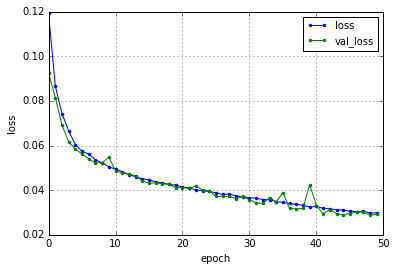

hiden node = 16
-edim=16-Window=4096-Overlap=16-RMSprop
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.1329 - val_loss: 0.0828
Epoch 2/50
6s - loss: 0.0848 - val_loss: 0.0731
Epoch 3/50
7s - loss: 0.0702 - val_loss: 0.0624
Epoch 4/50
7s - loss: 0.0647 - val_loss: 0.0610
Epoch 5/50
6s - loss: 0.0613 - val_loss: 0.0547
Epoch 6/50
6s - loss: 0.0569 - val_loss: 0.0569
Epoch 7/50
6s - loss: 0.0557 - val_loss: 0.0581
Epoch 8/50
6s - loss: 0.0544 - val_loss: 0.0566
Epoch 9/50
6s - loss: 0.0528 - val_loss: 0.0539
Epoch 10/50
6s - loss: 0.0522 - val_loss: 0.0539
Epoch 11/50
6s - loss: 0.0504 - val_loss: 0.0482
Epoch 12/50
6s - loss: 0.0495 - val_loss: 0.0488
Epoch 13/50
6s - loss: 0.0493 - val_loss: 0.0474
Epoch 14/50
6s - loss: 0.0483 - val_loss: 0.0463
Epoch 15/50
8s - loss: 0.0479 - val_loss: 0.0513
Epoch 16/50
7s - loss: 0.0475 - val_loss: 0.0490
Epoch 17/50
7s - loss: 0.0467 - val_loss: 0.0445
Epoch 18/50
7s - loss: 0.0467 - val_loss: 0.0499
Epoch 19/50
7s - loss

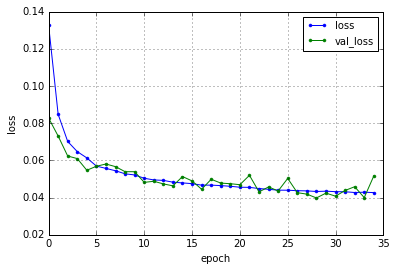

hiden node = 16
-edim=16-Window=4096-Overlap=16-Nadam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
6s - loss: 0.1367 - val_loss: 0.0972
Epoch 2/50
6s - loss: 0.0942 - val_loss: 0.0933
Epoch 3/50
6s - loss: 0.0864 - val_loss: 0.0845
Epoch 4/50
6s - loss: 0.0822 - val_loss: 0.0776
Epoch 5/50
6s - loss: 0.0777 - val_loss: 0.0754
Epoch 6/50
6s - loss: 0.0729 - val_loss: 0.0694
Epoch 7/50
6s - loss: 0.0698 - val_loss: 0.0661
Epoch 8/50
6s - loss: 0.0666 - val_loss: 0.0653
Epoch 9/50
6s - loss: 0.0671 - val_loss: 0.0645
Epoch 10/50
6s - loss: 0.0662 - val_loss: 0.0651
Epoch 11/50
6s - loss: 0.0655 - val_loss: 0.0659
Epoch 12/50
6s - loss: 0.0635 - val_loss: 0.0620
Epoch 13/50
6s - loss: 0.0608 - val_loss: 0.0637
Epoch 14/50
6s - loss: 0.0601 - val_loss: 0.0593
Epoch 15/50
6s - loss: 0.0590 - val_loss: 0.0580
Epoch 16/50
6s - loss: 0.0581 - val_loss: 0.0571
Epoch 17/50
6s - loss: 0.0568 - val_loss: 0.0575
Epoch 18/50
6s - loss: 0.0570 - val_loss: 0.0550
Epoch 19/50
6s - loss: 

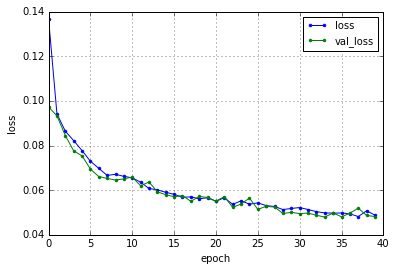

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
